In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [11]:
df=pd.read_csv('/home/rajesh/Desktop/movielens1m.csv')
df.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4


In [12]:
df.columns

Index(['Movie ID', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'Unknown', 'War', 'Western', '(no genres listed)', 'User ID', 'Age',
       'Gender', 'Occupation', 'Zipcode', 'Rating'],
      dtype='object')

In [13]:
df.Unknown.unique()

array([0])

In [28]:

person=pd.DataFrame(df[['Age','Gender','Occupation']])
person

,Age,Gender,Occupation
0,35,1,18
1,25,0,0
2,18,0,21
3,18,1,14
4,18,1,17
...,...,...,...
1000204,25,1,21
1000205,25,1,21
1000206,25,1,3
1000207,25,0,14


In [29]:
scaler=MinMaxScaler()
scaler.fit(person[['Age']])
person['Age']=scaler.transform(person[['Age']])
scaler.fit(person[['Gender']])
person['Gender']=scaler.transform(person[['Gender']])
scaler.fit(person[['Occupation']])
person['Occupation']=scaler.transform(person[['Occupation']])

In [30]:
person.head()

,Age,Gender,Occupation
0,0.618182,1.0,0.857143
1,0.436364,0.0,0.000000
2,0.309091,0.0,1.000000
3,0.309091,1.0,0.666667
4,0.309091,1.0,0.809524


In [38]:
km=KMeans()
y=km.fit_predict(df[['Age','Gender','Occupation']])
y
len(y)

1000209

In [41]:
person['cluster']=y
person0=person[person['cluster']==0]
person1=person[person['cluster']==1]
person2=person[person['cluster']==2]
person3=person[person['cluster']==3]
person4=person[person['cluster']==4]
person5=person[person['cluster']==5]
person6=person[person['cluster']==6]
person7=person[person['cluster']==7]

169956

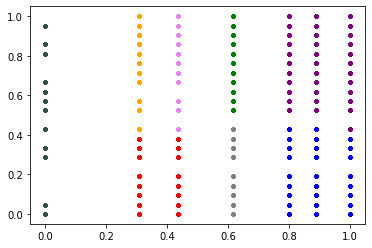

In [44]:
plt.scatter(person0['Age'],person0['Occupation'],marker='.',color='red')
plt.scatter(person1['Age'],person1['Occupation'],marker='.',color='green')
plt.scatter(person2['Age'],person2['Occupation'],marker='.',color='blue')
plt.scatter(person3['Age'],person3['Occupation'],marker='.',color='orange')
plt.scatter(person4['Age'],person4['Occupation'],marker='.',color='purple')
plt.scatter(person5['Age'],person5['Occupation'],marker='.',color='violet')
plt.scatter(person6['Age'],person6['Occupation'],marker='.',color='gray')
plt.scatter(person7['Age'],person7['Occupation'],marker='.',color='darkslategray')
plt.show()